In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
raw_data = pd.read_csv("info",
                       names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape",
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"])
print(raw_data.shape)
raw_data.head()

(683, 11)


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# drop ID and Class columns
raw_data2 = raw_data.drop(['id','Class'], axis=1)

# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
norm_data = (raw_data2 - np.mean(raw_data2)) / np.std(raw_data2)
norm_data.head()

# map class variable to 1's (malignant) and 0's (benign)
norm_data['Class'] = raw_data['Class'].map({4:1, 2:0})
norm_data.head()

In [ ]:
# divide normalized data into features and labels
features = norm_data.drop('Class', axis=1)
labels = norm_data['Class']
print(labels.head())
features.head()

In [3]:
# split data into training and test features and labels using 30% of data as validation/test set
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
(546, 9) (546,)
(137, 9) (137,)


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

In [5]:
classifier.add(Dense(units=6, input_dim=9,  activation='relu'))
classifier.add(Dense(units=6,  activation='relu'))

In [6]:
classifier.add(Dense(units=1,  activation='sigmoid'))

In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = classifier.fit(X_train, Y_train, epochs = 2000, validation_split = 0.15, verbose = 0,
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00276: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

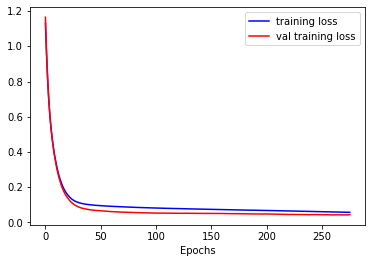

In [9]:
import matplotlib
from matplotlib import pyplot as plt

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [10]:
loss, acc = classifier.evaluate(X_test, Y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc*100)

5/5 [==============================] - 0s 0s/step - loss: 0.0620 - accuracy: 0.9708
Test loss:  0.06204117089509964
Test accuracy:  97.0802903175354


In [11]:
from sklearn.metrics import confusion_matrix
import itertools




p_test = classifier.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
print(cm)


[[97  0]
 [40  0]]


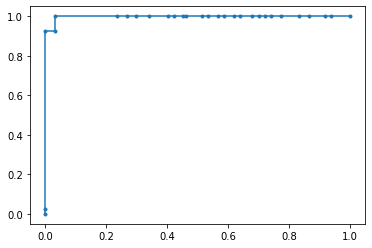

In [12]:
from sklearn.metrics import roc_curve, auc



y_pred =classifier.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
